### About the dataset:
This is a fictional data created by IBM data scientists for the aim of uncoversing factors deriving employess attrition (risk of leaving) in a company to understand why. 

The data is from: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

It consist of 
- Employee demographics: Age, Gender, MaritalStatus, Education.
- Job-related info: Department, Role, YearsAtCompany, JobSatisfaction.
- Performance metrics: PerformanceRating, Overtime, MonthlyIncome.
- Target variable: `Attrition` (Yes/No).

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df= pd.read_csv(r'Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
for c in df.columns:
    if df[c].dtype=='object':
        print(df[c].value_counts())
        print('===========================')

# for mapping: Attrition, Gender, Over18, OverTime.
# ordinal encoding: BusinessTravel.
# one-hot endcoding: Department, EducationField, JobRole and MaritalStatus maybe after mapping and cleaning it.

Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
Over18
Y    1470
Name: count,

In [6]:
# mapping to convert to numeric 
cols_for_mapping= ['Attrition', 'OverTime']

for m in df[cols_for_mapping]:
    df[m] = df[m].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df['Over18'] = df['Over18'].map({'Y':1})

df[['Attrition', 'OverTime', 'Gender', 'Over18']]

,Attrition,OverTime,Gender,Over18
0,1,1,1,1
1,0,0,0,1
2,1,1,0,1
3,0,1,1,1
4,0,0,0,1
...,...,...,...,...
1465,0,0,0,1
1466,0,0,0,1
1467,0,1,0,1
1468,0,0,0,1


In [7]:
df.drop(columns='Over18')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
df['DistanceFromHome'].value_counts()

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64

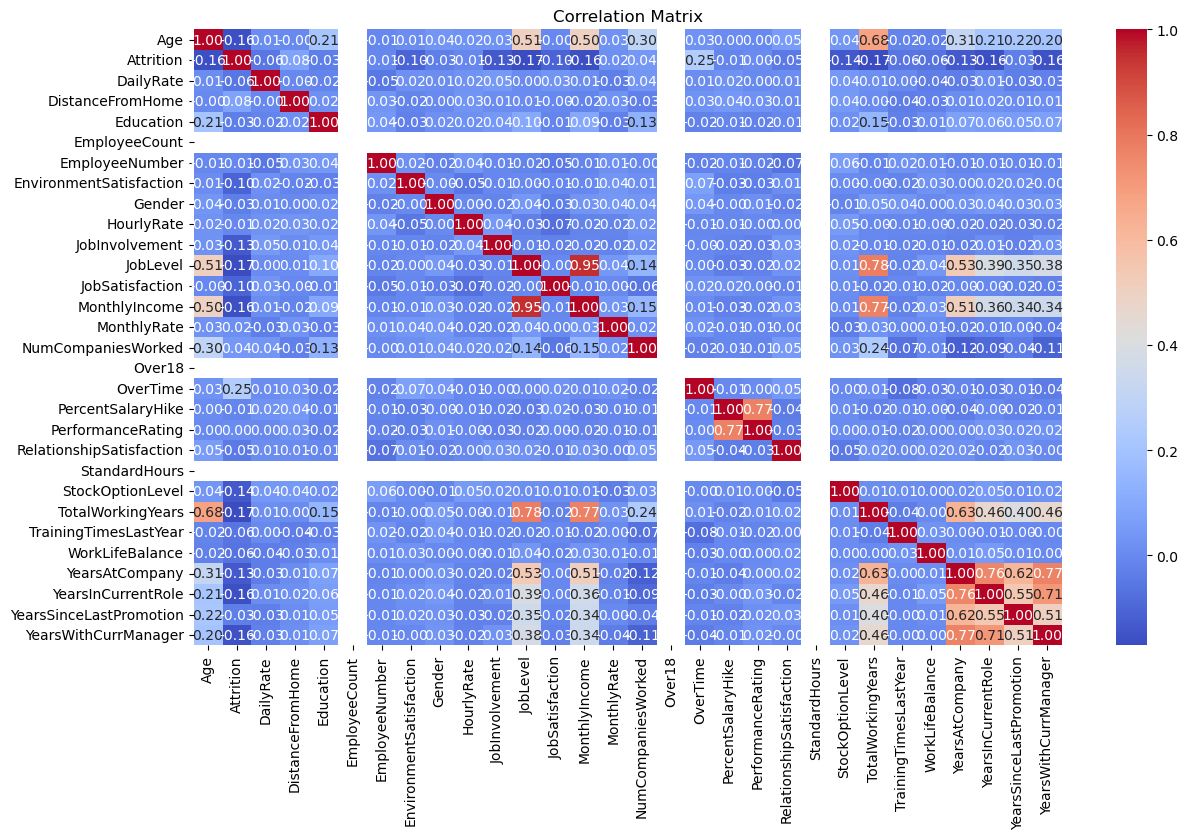

In [9]:
plt.figure(figsize=(14, 8))

sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
df.select_dtypes(include='number').columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

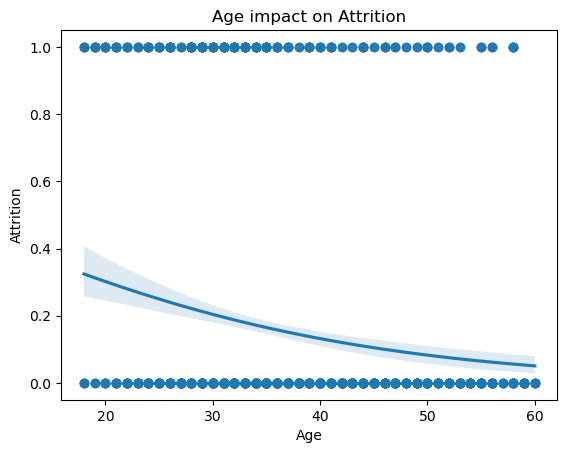

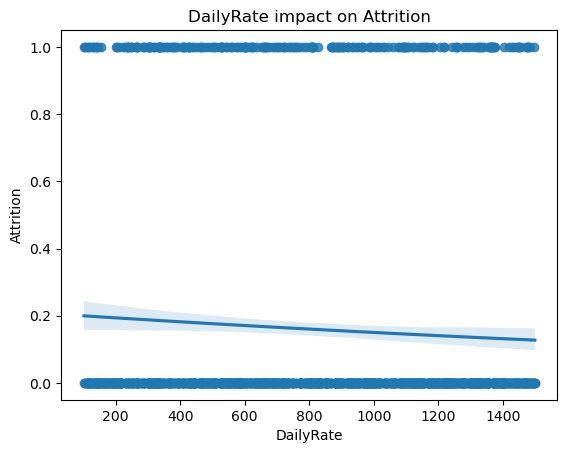

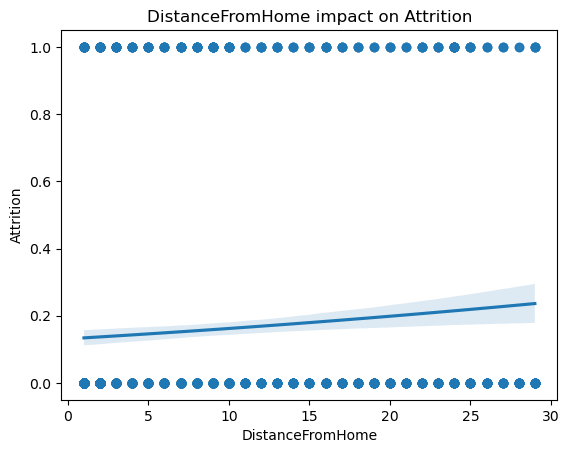

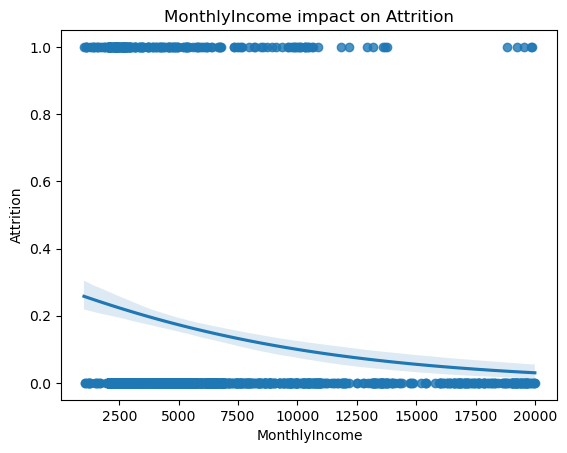

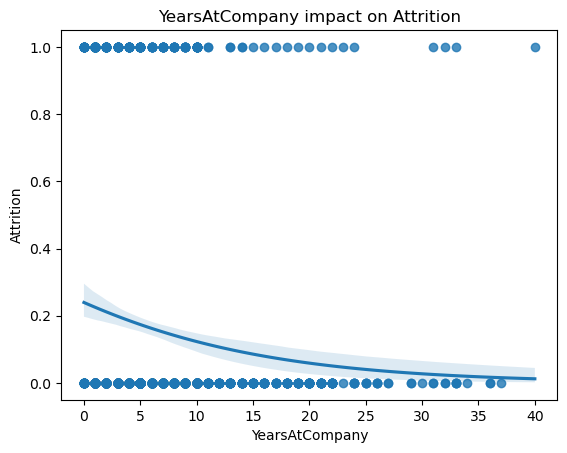

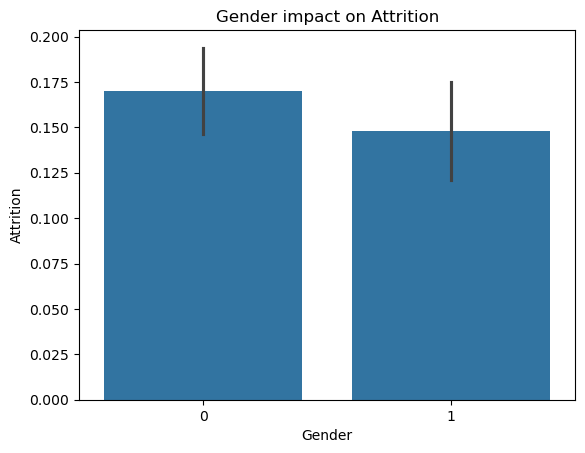

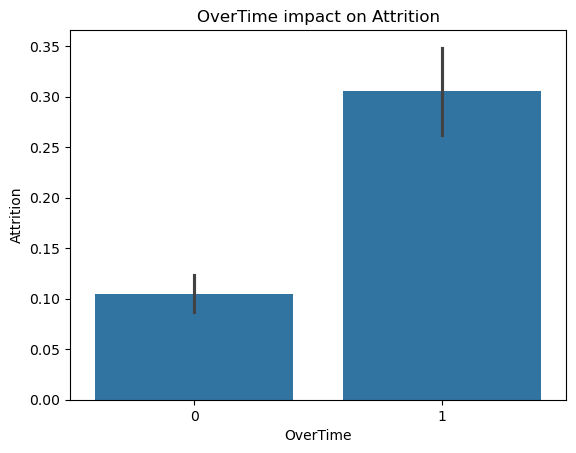

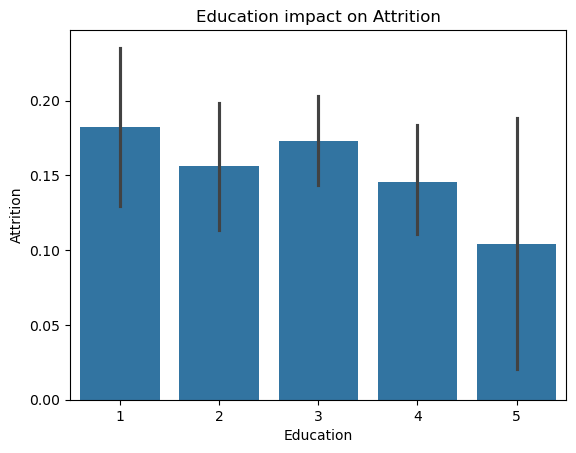

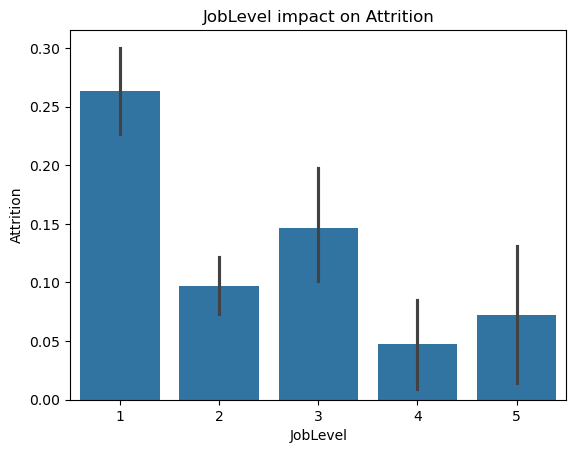

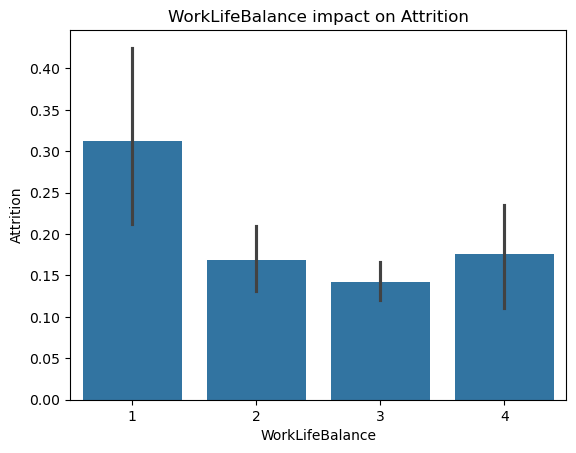

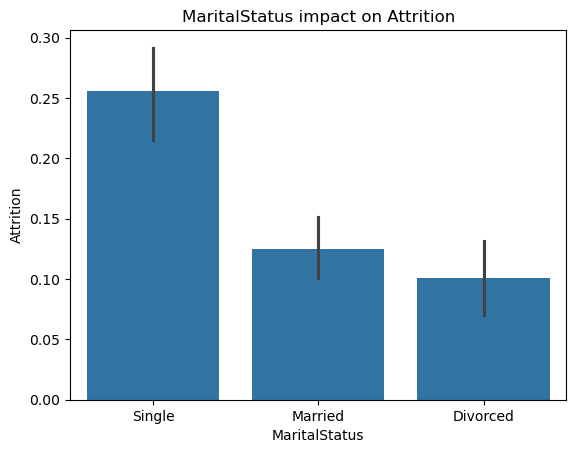

In [11]:

# Separate numeric and categorical features
numeric_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']  
categorical_features = ['Gender', 'OverTime', 'Education', 'JobLevel', 'WorkLifeBalance', 'MaritalStatus'] 

# Plot numeric variables
for n in numeric_features:
    sns.regplot(data=df, x=n, y='Attrition', logistic=True)
    plt.title(f'{n} impact on Attrition')
    plt.show()

# Plot categorical variables
for c in categorical_features:
    sns.barplot(data=df, x=c, y='Attrition')
    plt.title(f'{c} impact on Attrition')
    plt.show()


In [12]:
df.groupby('MaritalStatus')['Attrition'].mean() # I was thinking of mapping single and divorced as one thing if their mean values were close to each other
# but turns out that single attritioned more than divorce maybe because younger people are more likely to be single and move alot and can make job changes easier
# so I will use one hot encoding with it

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
Name: Attrition, dtype: float64

Encoding

In [13]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [14]:
# ordinal encoding: BusinessTravel.
df['BusinessTravel'] =df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2})

# one-hot endcoding: Department, EducationField, JobRole and MaritalStatus maybe after mapping and cleaning it.
ohe_cols= ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

from sklearn.preprocessing import OneHotEncoder

ohe= OneHotEncoder(sparse_output=False)
encoded_features = ohe.fit_transform(df[ohe_cols].astype(str))
encoded_features_names= ohe.get_feature_names_out(ohe_cols)

encoded_df= pd.DataFrame(data=encoded_features, columns=encoded_features_names, index= df.index)

df= df.drop(columns=ohe_cols)
df= pd.concat([df, encoded_df], axis=1)

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,2,279,8,1,1,2,3,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1,1373,2,2,1,4,4,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,2,1392,3,4,1,5,4,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,1,591,2,1,1,7,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df.info() # no remaining objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   BusinessTravel                     1470 non-null   int64  
 3   DailyRate                          1470 non-null   int64  
 4   DistanceFromHome                   1470 non-null   int64  
 5   Education                          1470 non-null   int64  
 6   EmployeeCount                      1470 non-null   int64  
 7   EmployeeNumber                     1470 non-null   int64  
 8   EnvironmentSatisfaction            1470 non-null   int64  
 9   Gender                             1470 non-null   int64  
 10  HourlyRate                         1470 non-null   int64  
 11  JobInvolvement                     1470 non-null   int64

In [17]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [18]:
df[['Age','DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber' ,'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'StandardHours', 'TotalWorkingYears', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
# these are the continous features in the dataframe (some of them are ordinaly ecnoded)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,2,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,3,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,3,1,2,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,4,2,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,2,3,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,4,2,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,2,2,2,...,4,80,0,17,3,2,9,6,0,8


In [19]:
df= df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber']) # repeatative and won't be helpful


### Train, Test Split

In [20]:
X= df.drop(columns='Attrition')
y= df['Attrition']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

### Sampling and Standardizing

In [21]:
y.value_counts() # it's unbalanced

Attrition
0    1233
1     237
Name: count, dtype: int64

In [22]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)


features_to_scale = [ # true continuous numerical features
    'Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'TotalWorkingYears', 'PercentSalaryHike',
    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # standardize the data
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [23]:
X_train.shape

(1964, 47)

### Modeling

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
# Define and train various classification models to predict loan approval and choose the best one

classification_models = {
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Machine" : SVC(),
    "XGBoost" : XGBClassifier(),  # Uncomment if you have XGBoost installed
}

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")
    print(classification_report(y_test, model.predict(X_test)))
    print('---------------------------------------------------------')

Logistic Regression model trained.
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       251
           1       0.30      0.58      0.39        43

    accuracy                           0.74       294
   macro avg       0.61      0.67      0.61       294
weighted avg       0.82      0.74      0.77       294

---------------------------------------------------------
K-Nearest Neighbors model trained.
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       251
           1       0.18      0.30      0.22        43

    accuracy                           0.69       294
   macro avg       0.52      0.53      0.51       294
weighted avg       0.76      0.69      0.72       294

---------------------------------------------------------
Decision Tree model trained.
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       251
           1       0.3

## Model Interpretation (Explainability)
Finding out what factors increases or decreases the prop of prediction (what factors impact the prediction)

For one data point

In [25]:
import shap

data_for_prediction= X_test.iloc[[1]] # single-row DataFrame
# returns a DataFrame, preserving the feature names and column alignment — crucial for SHAP and XGBoost.

model.predict_proba(data_for_prediction) # the model is XGBoost

# XGBoost + SHAP
explainer= shap.TreeExplainer(model)

shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

# A logit of -6.94 corresponds to a probability of about 0.097%, meaning the model is predicting a very low chance of class 1 for that instance.

In [26]:
print(type(shap_values))
print(np.shape(shap_values))
print(type(explainer.expected_value))


<class 'numpy.ndarray'>
(1, 47)
<class 'numpy.float32'>


### Summary plots
For all data points

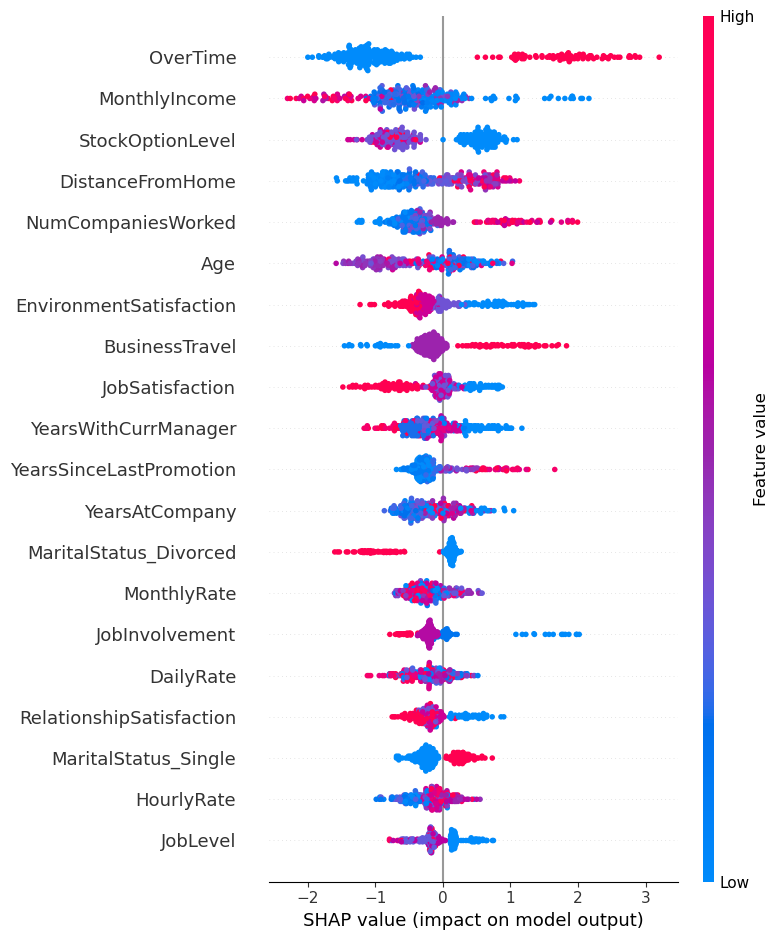

In [27]:

# Create object that can calculate shap values
explainer_all = shap.TreeExplainer(model)

# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values_all = explainer_all.shap_values(X_test) # This is what we will plot.


shap.summary_plot(shap_values_all, X_test)

# y-axis: the features are sorted from top to bottom based on importance
# X-axis: SHAP values (impact on the model output). Positive values push the prediction toward class 1, negative values push it toward class 0.


### Interpretation

- y-axis: the features are sorted from top to bottom based on importance
- X-axis: SHAP values (impact on the model output). Positive values push the prediction toward class 1, negative values push it toward class 0.

The model's prediction is most influenced by:
- **OverTime**: Employees with high overtime (red) are much more likely to be predicted as leaving (class 1).
- **Age**: generally younger(blue) employee are more likely to leave the company (class 1) and the older (red) are more likely to stay.
- **EnvironmentSatisfaction**: the higher the environment satisfaction the higher the stay (class 0) and vice versa unhappy employees are more likely to leave. 
- **DistanceFromHome**: smaller distance from home (blue) lowers attrition risk and the higher the distance (red) the higher the attrition risk 
- **JobSatisfaction**: higher job satisfaction (blue) lowers attrition risk and the lower it is (red) the higher the attrition risk
These features have the widest spread in SHAP values, meaning they cause large shifts in predictions.

How to use this insight:
- Retention Strategy: Focus on reducing overtime, improving satisfaction, and supporting younger employees.
- Model Trust: SHAP confirms the model is using sensible features aligned with HR realities.
- Feature Engineering: These top features might also guide how to create new or refined features.

In [28]:
print(np.shape(shap_values_all))

(294, 47)


### SHAP Dependence Contribution Plots  
Diving into one feature at a time

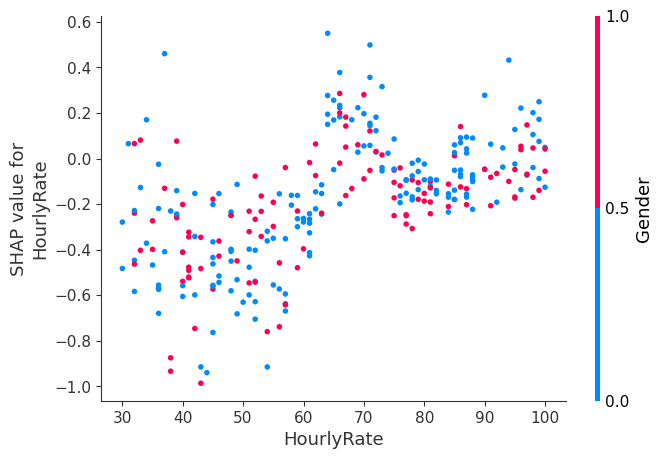

In [29]:
# after initializing the code in the previous code cell for shap

shap.dependence_plot('HourlyRate', shap_values_all, X_test, interaction_index= 'Gender')

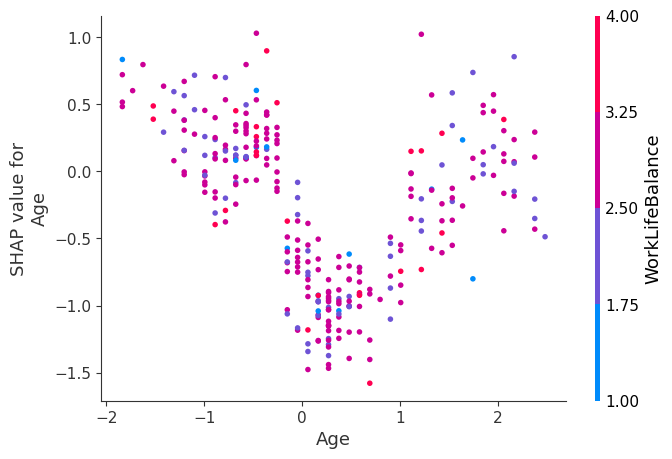

In [30]:
shap.dependence_plot('Age', shap_values_all, X_test, interaction_index= 'WorkLifeBalance')

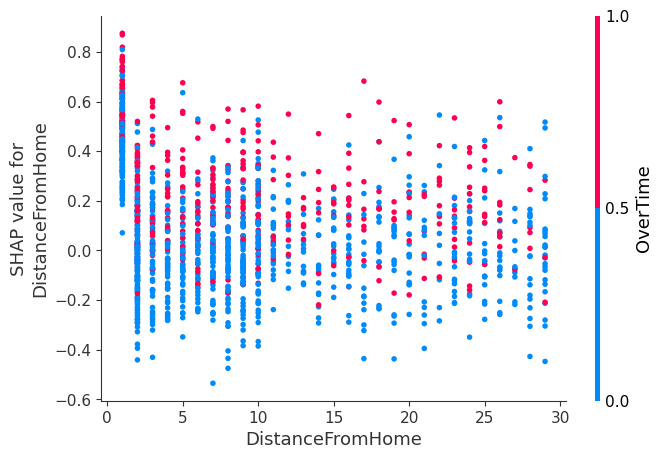

In [31]:

expl = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
shap_values = expl.shap_values(X)

shap.dependence_plot('DistanceFromHome', shap_values, X, interaction_index="OverTime")

# most of employees who work over time are more likely to attrition but also it seems like the company gives most of the overtime to employess who live near the company.